### Word Embeddings

Word Embeddings are methods that convert words into numerical vectors. The goal is to create dense vector representations that preserve the semantic and contextual relationships between words.

!["word-embeddings"](../images/2/2-word-embeddings.png)


---


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from gensim.models import FastText, Word2Vec
from gensim.utils import simple_preprocess
from sklearn.decomposition import PCA

sentences = [
    "Cat is a very cute animal",
    "Dogs are pets",
    "Cats are generally independent",
    "Dogs are loyal and friendly",
    "Animals are good friends for humans",
]

tokenized_sentences = [simple_preprocess(sentence) for sentence in sentences]

In [3]:
# Word2Vec (by Google)
word2vec_model = Word2Vec(
    sentences=tokenized_sentences, vector_size=50, window=5, min_count=1, sg=0
)

In [4]:
# FastText (by Facebook)
fasttext_model = FastText(
    sentences=tokenized_sentences, vector_size=50, window=5, min_count=1, sg=0
)

In [5]:
def plot_word_embedding(model, title):
    word_vectors = model.wv
    words = list(word_vectors.index_to_key)
    vectors = [word_vectors[word] for word in words]

    # PCA
    pca = PCA(n_components=3)
    reduced_vectors = pca.fit_transform(vectors)

    # 3D
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection="3d")

    # Vectors
    ax.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], reduced_vectors[:, 2])

    # Label
    for i, word in enumerate(words):
        ax.text(
            reduced_vectors[i, 0],
            reduced_vectors[i, 1],
            reduced_vectors[i, 2],
            word,
            fontsize=12,
        )

    ax.set_title(title)
    ax.set_xlabel("Component 1")
    ax.set_ylabel("Component 2")
    ax.set_zlabel("Component 3")
    plt.show()

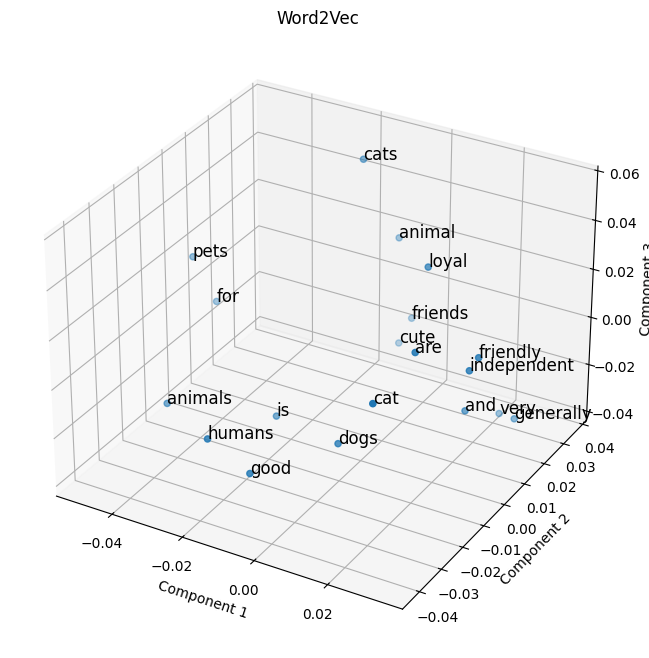

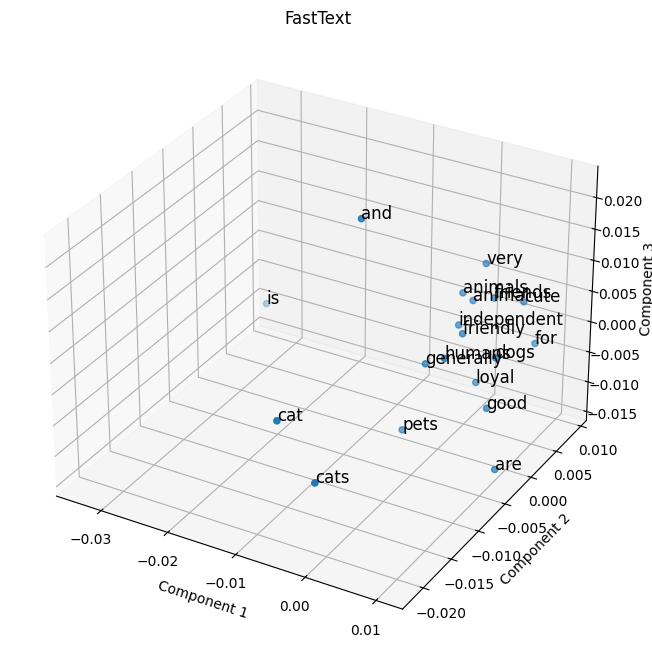

In [6]:
plot_word_embedding(word2vec_model, "Word2Vec")
plot_word_embedding(fasttext_model, "FastText")

---


#### Real-Life Application of Word Embeddings Using the IMDB Dataset

- The dataset link &rarr; [IMDB_Dataset.csv](https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews)


In [7]:
# Library
import re

%matplotlib widget
import matplotlib.pyplot as plt
import nltk
import pandas as pd
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess
from nltk.corpus import stopwords
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

nltk.download("stopwords")
stop_words = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\iscie\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
# Dataset
df = pd.read_csv("../data/IMDB_Dataset.csv")
documents = df["review"]

In [9]:
# Text Preprocessing
def clean_text(text):
    text = re.sub(r"\d+", "", text)  # Clean nums
    text = re.sub(r"[^\w\s]", "", text)  # Clean special chars
    text = " ".join(
        [word for word in text.split() if word not in stop_words and len(word) > 2]
    )  # Clean short words
    return text


cleaned_documents = [clean_text(doc) for doc in documents]

In [10]:
# Tokenization
tokenized_documents = [simple_preprocess(doc) for doc in cleaned_documents]

In [11]:
# Word2Vec model
model = Word2Vec(
    sentences=tokenized_documents, vector_size=50, window=5, min_count=1, sg=0
)

word_vectors = model.wv
words = list(word_vectors.index_to_key)[:500]
vectors = [word_vectors[word] for word in words]

In [12]:
# Clustering 2-3 set
kmeans = KMeans(n_clusters=3)
kmeans.fit(vectors)
clusters = kmeans.labels_

In [13]:
# PCA 50 dim --> 3 dim.
pca = PCA(n_components=3)
reduced_vectors = pca.fit_transform(vectors)

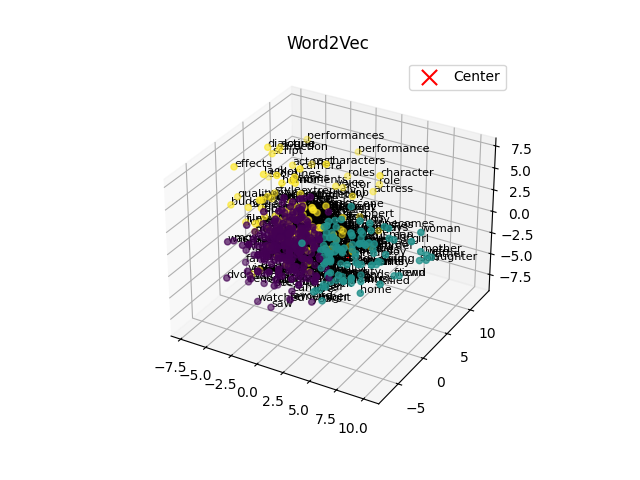

In [14]:
# 2D Visualization and Label for each vector
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

ax.scatter(
    reduced_vectors[:, 0],
    reduced_vectors[:, 1],
    reduced_vectors[:, 2],
    c=clusters,
    cmap="viridis",
)

centers = pca.transform(kmeans.cluster_centers_)
ax.scatter(
    centers[:, 0],
    centers[:, 1],
    centers[:, 2],
    c="red",
    marker="x",
    s=120,
    label="Center",
)
plt.title("Word2Vec")
plt.legend()

for i, word in enumerate(words):
    ax.text(
        reduced_vectors[i, 0],
        reduced_vectors[i, 1],
        reduced_vectors[i, 2],
        word,
        fontsize=8,
    )

plt.show()